# Libraries

In [1]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%matplotlib inline

# Generate uniform data

In [2]:
from generate_data import *

observations = 10_000

inputs, targets = generate_data(observations = observations, return_targets = True)

## Distribution of generated data

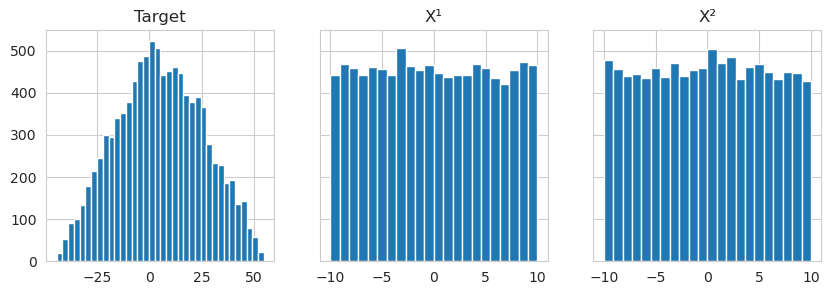

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (10, 3), sharey = True)

hist_kws = {"alpha" : 1}

sns.distplot(targets.reshape(observations,), kde = False, hist_kws = hist_kws, ax = ax1)
ax1.set_title("Target")

sns.distplot(inputs[:, 0], kde = False, hist_kws = hist_kws, ax = ax2)
ax2.set_title("X¹")

sns.distplot(inputs[:, 1], kde = False, hist_kws = hist_kws, ax = ax3)
ax3.set_title("X²");

## XS, ZS, Target

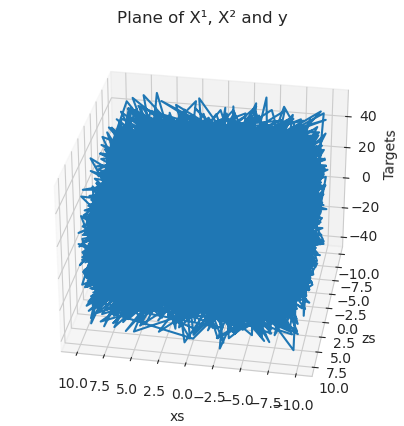

In [4]:
from mpl_toolkits.mplot3d import Axes3D

xs = np.random.uniform(low = -10, high = 10, size = (observations, 1))
    
zs = np.random.uniform(low = -10, high = 10, size = (observations, 1))

fig = plt.figure(figsize = (5, 5))

ax = fig.add_subplot(111, projection = '3d')

ax.plot(xs, zs, targets)

ax.set_title("Plane of X¹, X² and y")

ax.set_xlabel("xs")
ax.set_ylabel("zs")
ax.set_zlabel("Targets")

ax.view_init(azim = 100)

plt.show();

# Generate NN Weights & Biases

In [5]:
from generate_weights import *

weights, biases = generate_weights(return_biases = True)

In [6]:
print(f"Weights: {weights[0]}, {weights[1]}")
print(f"Biases: {biases}")

Weights: [0.0807047], [-0.09345495]
Biases: [0.08747593]


# Train basic Neural Network

In [7]:
from train import *

(w, b), outputs = train(X = inputs, y = targets, weights = weights,
             biases = biases, observations = observations, epochs = 1000, return_outputs = True)

Epoch 1/1000: loss 212.84941349398397
Epoch 2/1000: loss 34.923842149955696
Epoch 3/1000: loss 13.94748039144024
Epoch 4/1000: loss 11.134565686967457
Epoch 5/1000: loss 10.437945686338415
Epoch 6/1000: loss 10.000906987833591
Epoch 7/1000: loss 9.608029043483452
Epoch 8/1000: loss 9.233817955274425
Epoch 9/1000: loss 8.874785089593024
Epoch 10/1000: loss 8.53001095313746
Epoch 11/1000: loss 8.198894029405043
Epoch 12/1000: loss 7.880889243145638
Epoch 13/1000: loss 7.575476883797621
Epoch 14/1000: loss 7.282158258614426
Epoch 15/1000: loss 7.000454472924018
Epoch 16/1000: loss 6.729905601233579
Epoch 17/1000: loss 6.470069930875995
Epoch 18/1000: loss 6.220523240213326
Epoch 19/1000: loss 5.980858105956398
Epoch 20/1000: loss 5.750683237975194
Epoch 21/1000: loss 5.529622840456665
Epoch 22/1000: loss 5.317315998360244
Epoch 23/1000: loss 5.11341608816861
Epoch 24/1000: loss 4.917590211971581
Epoch 25/1000: loss 4.7295186539591505
Epoch 26/1000: loss 4.548894358436358
Epoch 27/1000: lo

# Trained Weights & Biases

In [8]:
print(f"Weights: {w[0]}, {w[1]}")
print(f"Biases: {b}")

Weights: [2.00176609], [-3.00082829]
Biases: [4.99438015]


# NN Outputs vs. Targets

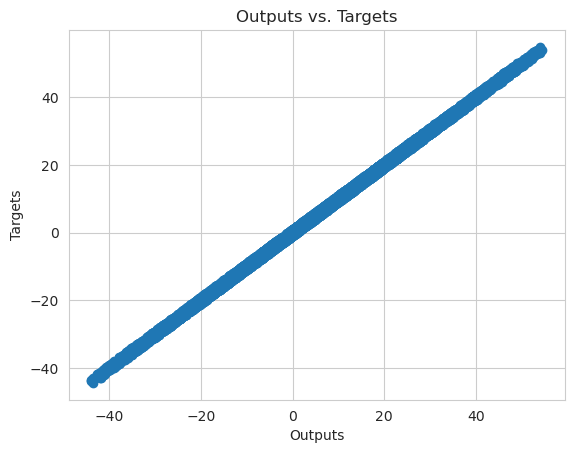

In [9]:
plt.scatter(outputs, targets)
plt.xlabel("Outputs")
plt.ylabel("Targets")
plt.title("Outputs vs. Targets")
plt.show()